In [222]:
%matplotlib inline
import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from PIL import Image

In [265]:
lat_arr=range(-90,90)
long_arr=range(0,360)
def get_heatmap(long_cord,lat_cord):
    url='http://144.206.233.147/thredds/dodsC/Data/igrf11.nc.ascii?data[0:1:0][{}:1:{}][{}:1:{}]'\
    .format(long_cord[0],long_cord[1],lat_cord[0],lat_cord[1])
    return url
def parse_response(url):
    r=requests.get(url).text
    r=r[r.find('[0][0]'):r.find('data.level')][:-2]
    a=r.split('\n')
    a=[i.split(', ')[1:] for i in a]
    a=np.array(a,dtype='float')
    return a
def resize_hm(heat_map,sample):
    resized_heat_map=np.array(Image.fromarray(heat_map).resize((sample.width,sample.height)))
    return resized_heat_map

In [266]:
url=get_heatmap([0,100],[0,100])
heat_map=parse_response(url)
sample=Image.open('map.jpg')
resized_heat_map=resize_hm(heat_map,sample)

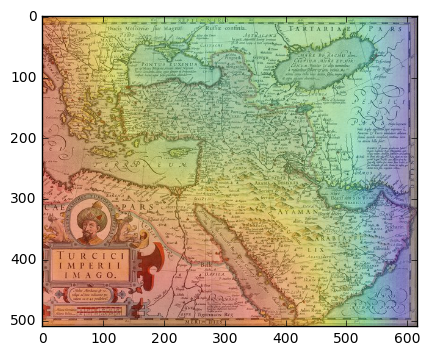

In [268]:
implot = plt.imshow(np.array(sample),origin='upper')
#generating random data for the histogram
#x=numpy.random.normal(500, 100, size=1000)
#y=numpy.random.normal(100, 50, size=1000)
#heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
#extent = [xedges[0], xedges[-1], yedges[-1], yedges[0]]
plt.imshow(resized_heat_map,alpha=.3,origin='upper')#,cmap='magma')
plt.show()